<a href="https://colab.research.google.com/github/EANimesha/Online-Exam-Cheating-Detection/blob/master/Data%20Visualize%20and%20Analyse/Data_Visualize_Test_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/gazeData7.csv',names=["X", "Y"])

In [5]:
df.head()

,X,Y
0,682,45
1,614,51
2,636,51
3,641,74
4,952,66


# Displaying the gaze points and screen boundaries/edges - Scatter PLot

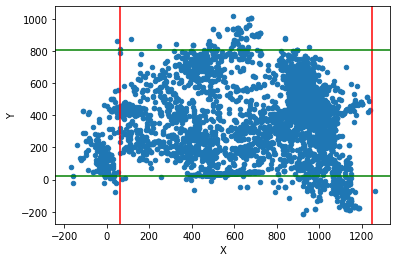

In [6]:
df.plot(kind='scatter', x='X', y='Y')
plt.axvline(x=64,color='red')
plt.axvline(x=1247,color='red')
plt.axhline(y=804,color='green')
plt.axhline(y=23,color='green')

In the above graph I have plotted the lines of boundaries in red and green color. red lines - > x min and x max of screen, green line -> y min and y max of screen

# Trying the K means Clustering

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(df)
kmeans.labels_[0:100]

array([9, 9, 9, 9, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 8, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 9, 9, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

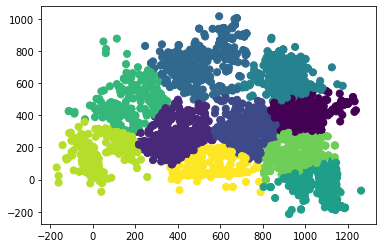

In [15]:
plt.scatter(df['X'], df['Y'], c=kmeans.labels_, s=50, cmap='viridis')

### Display in HeatMap

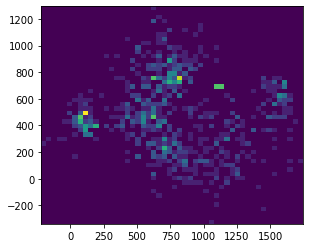

In [ ]:
x = np.array(df['X'])
y =np.array(df['Y'])

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

# Display Data Using Seaboarn KDE - Kernal Density Image

In [ ]:
from scipy import stats, integrate
import seaborn as sns
import matplotlib.image as mpimg 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


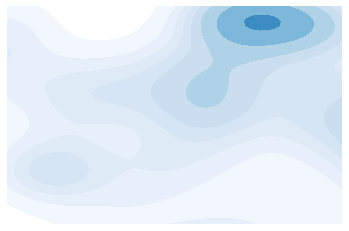

In [ ]:
x= df['X'].to_numpy()
y= df['Y'].to_numpy()

ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)

ax.set_frame_on(False)
plt.xlim(0, 704)
plt.ylim(576, 0)
plt.axis('off')
plt.show()

refered https://zbigatron.com/generating-heatmaps-from-coordinates/ and https://stackoverflow.com/questions/50091591/plotting-seaborn-heatmap-on-top-of-a-background-picture

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 

file = "/content/drive/MyDrive/Colab Notebooks/Research/gazeData7.csv"
df = pd.read_csv(file)
import seaborn as sns
map_img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Research/imgd.PNG') 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


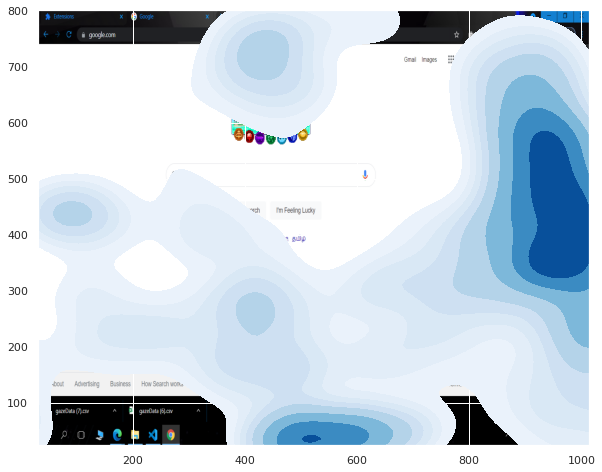

In [ ]:
sns.set(rc={'figure.figsize':(10.0,8.0)})
hmax = sns.kdeplot(x, y, cmap="Blues", shade=True, bw=.15)
hmax.collections[0].set_alpha(0)

plt.imshow(map_img, zorder=0, extent=[30.0, 1014.0, 24.0, 800.0])
plt.show()
